<h1>1I/2017 U1 (ʻOumuamua) light curve</h1>

Attempts to reproduce the ʻOumuamua light curve from different research papers and naive analysis of aggregations


In [1]:
%matplotlib inline
%run functions.py

colors = {
    '705' : '#F0E442', # APO, 'yellow'
    'G37' : '#56B4E9', # DCT, sky blue, 'cyan'
    'NOT' : '#CC79A7', # NOT, reddish purple, 'magenta' 
    'WIYN' : '#009E73', #WIYN, bluish green, 'green',
    'GMOS' : '#D55E00', # Gemini North, vermillion, 'red'
    'WHT' : '#E69F00', # 'orange'
    '926' : 'black', # Tenagra II
}

def colorForObservatory(obs):
    return colors.get(obs, '#0072B2') # default 'blue'

def plotData(data):
    plt.rcParams['figure.figsize'] = (15, 7);
    plt.scatter(data.mjd - 58000, data.mag
        , c = data.observatory.apply(colorForObservatory));
    plt.errorbar(data.mjd - 58000, data.mag, yerr = data.error,
        fmt = 'o', markersize = 0, linewidth = 1, c = 'lightgrey', zorder=-100);
    plt.xlabel('time (MJD - 58000)')
    plt.ylabel('mag')
    
    # fake lines for legend entries
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors.values()]
    plt.legend(markers, colors.keys(), numpoints=1)

    plt.gca().invert_yaxis();

<h3>From <a href="https://arxiv.org/abs/1711.04927">Bolin et al</a> (<a href="https://github.com/dhuppenkothen/CometPeriodSearch">ancillary github repository</a>)</h3>

In [2]:
data1 = pd.read_csv(
    "filesFromReferences/APO_DCT_A2017U1_2017_10_30_date_mjd_mag_r_mag_unc_obs_code.txt",
    sep=" ", 
    names=["mjd", "mag", "error", "observatory"])

data1['time'] = data1.mjd.apply(lambda x: Time(x, format='mjd'))
data1['when'] = data1.apply(lambda row: row.time.datetime.strftime('%Y-%b-%d %H:%M:%S'), axis=1)
#data1['timestamp'] = data.apply(lambda row: row.time.jd, axis=1)
data1['date'] = data1.apply(lambda row: row.time.datetime.strftime('%Y-%m-%d'), axis=1)


print(data1[:3])

            mjd    mag  error observatory               time  \
0  58055.234366  23.10  0.091         705      58055.2343656   
1  58055.287290  22.37  0.112         705      58055.2872905   
2  58055.298921  22.18  0.112         705  58055.29892080001   

                   when        date  
0  2017-Oct-29 05:37:29  2017-10-29  
1  2017-Oct-29 06:53:41  2017-10-29  
2  2017-Oct-29 07:10:26  2017-10-29  


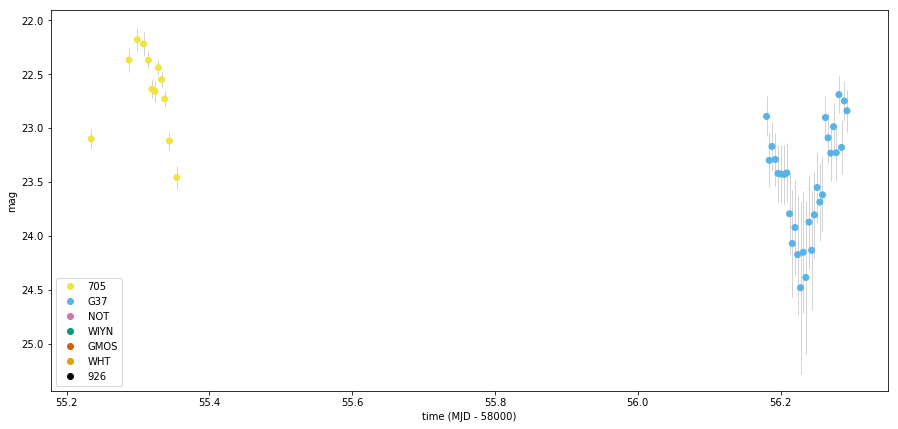

In [3]:
data = data1

plotData(data1)

#apoObservations = data[(data.observatory == '705')]

<h3>From <a href="https://arxiv.org/abs/1711.05687">Jewitt et al</a><h3>

In [4]:
data2 = pd.read_csv(
    "filesFromReferences/jewitt_et_al.txt",
    sep=",", 
    names=["decimalDaytime", "observatory", "band", "mag", "error", "absMag"])

data2['time'] = data2.decimalDaytime.apply(timeFromDecimalDaytime)
data2['mjd'] = data2.time.apply(lambda x: x.mjd)
data2['when'] = data2.apply(lambda row: row.time.datetime.strftime('%Y-%b-%d %H:%M:%S'), axis=1)
#data2['timestamp'] = data.apply(lambda row: row.time.jd, axis=1)
data2['date'] = data2.apply(lambda row: row.time.datetime.strftime('%Y-%m-%d'), axis=1)


print(data2[:3])

    decimalDaytime observatory band    mag  error  absMag  \
0  2017 10 25.9778         NOT    B  23.53   0.12   23.83   
1  2017 10 25.9799         NOT    B  23.10   0.12   23.40   
2  2017 10 25.9813         NOT    B  23.25   0.12   23.55   

                      time           mjd                  when        date  
0  2017-10-25T23:28:01.000  58051.977789  2017-Oct-25 23:28:01  2017-10-25  
1  2017-10-25T23:31:03.000  58051.979896  2017-Oct-25 23:31:03  2017-10-25  
2  2017-10-25T23:33:04.000  58051.981296  2017-Oct-25 23:33:04  2017-10-25  


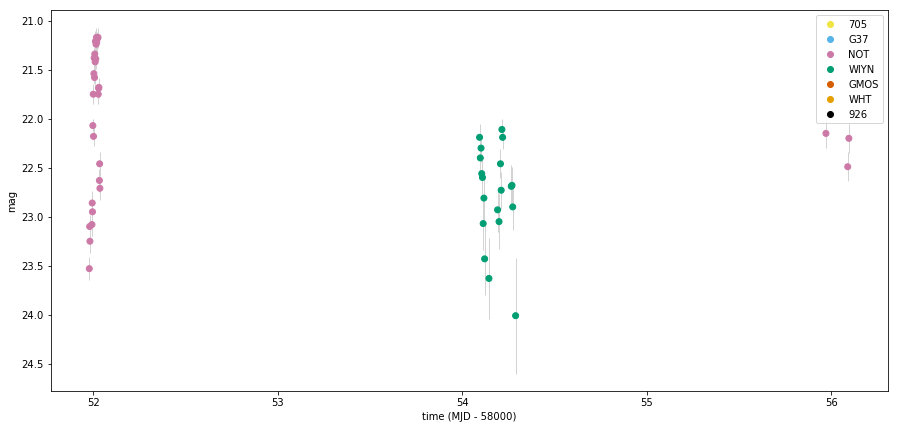

In [5]:
plotData(data2)

<h3>From <a href="https://arxiv.org/abs/1711.06214">Bannister et al</a></h3>

In [6]:
data3 = pd.read_csv(
    "filesFromReferences/bannister_et_al.txt",
    sep=",", 
    names=["mjd", "observatory", "band", "filter", "mag", "error", "exposure"])

data3['time'] = data3.mjd.apply(lambda x: Time(x, format='mjd'))
data3['when'] = data3.apply(lambda row: row.time.datetime.strftime('%Y-%b-%d %H:%M:%S'), axis=1)
#data3['timestamp'] = data.apply(lambda row: row.time.jd, axis=1)
data3['date'] = data3.apply(lambda row: row.time.datetime.strftime('%Y-%m-%d'), axis=1)


print(data3[:3])

           mjd observatory band filter    mag  error  exposure  \
0  58055.25860        GMOS    r  G0303  22.74   0.03       300   
1  58055.26323        GMOS    r  G0303  22.66   0.03       300   
2  58055.26902        GMOS    g  G0301  23.11   0.07       300   

                time                  when        date  
0         58055.2586  2017-Oct-29 06:12:23  2017-10-29  
1        58055.26323  2017-Oct-29 06:19:03  2017-10-29  
2  58055.26902000001  2017-Oct-29 06:27:23  2017-10-29  


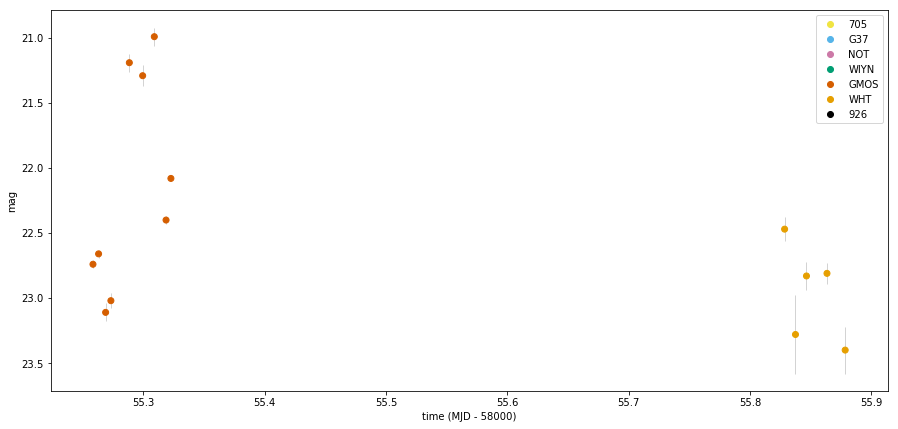

In [7]:
plotData(data3)

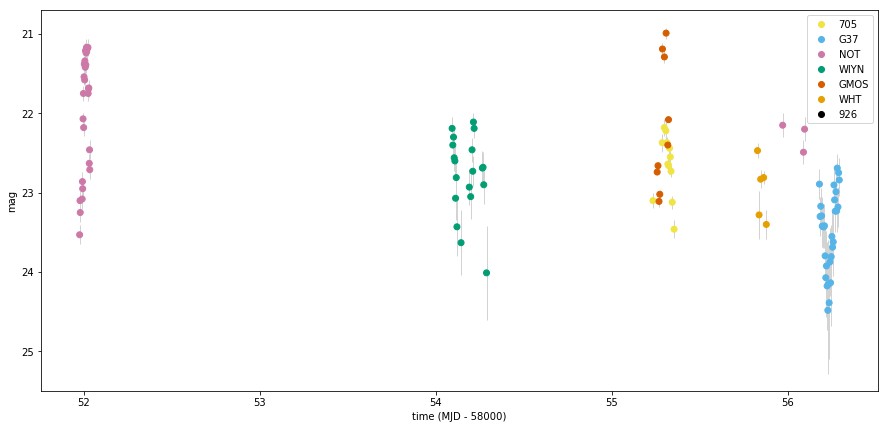

In [8]:
plotData(pd.concat([data1, data2, data3]))
plt.savefig('plots/lightcurve_nompc.png')

<h3><a href="https://www.minorplanetcenter.net/db_search/show_object?utf8=%E2%9C%93&object_id=A%2F2017+U1">From MPC data</a>, picked Tenagra II (most data points)</h3>

In [9]:
mpcData = pd.read_fwf('a2017u1_mpc.txt',
    header = None,
    widths = [13, 1, 1, 16, 12, 12, 10, 5, 1, 6, 3],
    usecols= [1, 2, 3, 7, 8, 9, 10],
    names = ['note1', 'note2', 'decimalDaytime', 'mag', 'band', 'blank', 'observatory']
)

mpcData['time'] = mpcData.decimalDaytime.apply(timeFromDecimalDaytime)
mpcData['mjd'] = mpcData.time.apply(lambda x: x.mjd)
mpcData['when'] = mpcData.apply(lambda row: row.time.datetime.strftime('%Y-%b-%d %H:%M:%S'), axis=1)
mpcData['timestamp'] = mpcData.apply(lambda row: row.time.jd, axis=1)
mpcData['date'] = mpcData.apply(lambda row: row.time.datetime.strftime('%Y-%m-%d'), axis=1)

#relevantMpcData = mpcData.loc[mpcData['mjd'] > 58055.2]
relevantMpcData = mpcData.loc[mpcData['date'] > '2017-10-25']
relevantMpcData = relevantMpcData[relevantMpcData.observatory == '926'] # Tenagra II
relevantMpcData.reset_index(inplace=True)

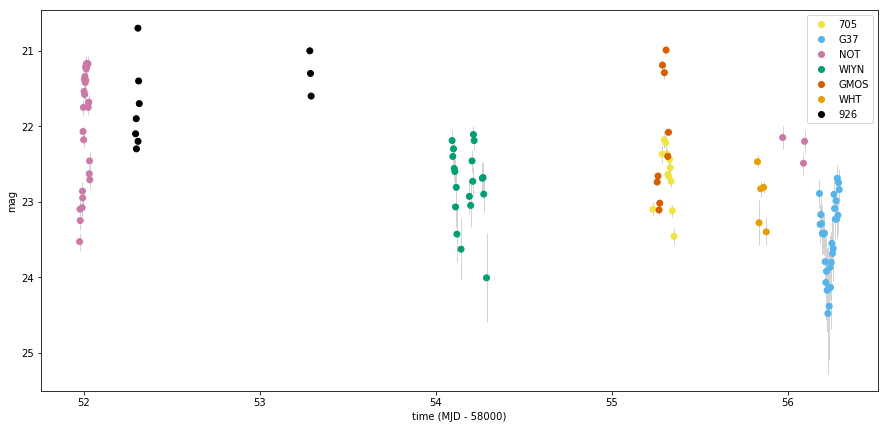

In [10]:
allData = pd.concat([data1, data2, data3, relevantMpcData])
plotData(allData)
plt.savefig('plots/lightcurve_all.png')

Let's fold all data points by one of the rotation periods from the literature

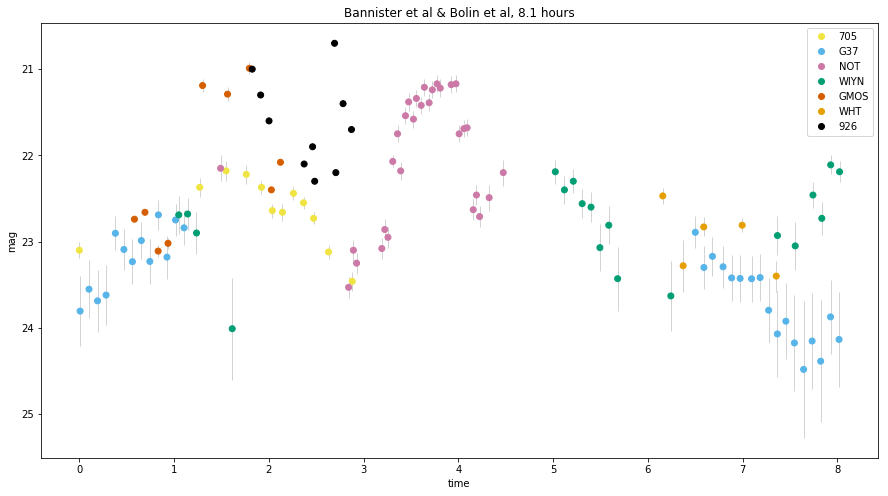

In [11]:
from astropy import units

foldedData = pd.concat([data1, data2, data3, relevantMpcData])
                       
foldZero = foldedData.iloc[0].mjd
                        
def fold(foldZero, periodInHours, mjd):
    diff = (Time(mjd, format='mjd') - Time(foldZero, format='mjd'))
    return (diff.to('hour') % (periodInHours * units.hour)).value

def plotFold(periodInHours, title):
    foldedData['fold'] = foldedData.apply(lambda row: fold(foldZero, periodInHours, row.mjd), axis=1)
    data = foldedData

    plt.rcParams['figure.figsize'] = (15, 8);
    plt.scatter(data.fold, data.mag
        , c = data.observatory.apply(colorForObservatory));
    plt.errorbar(data.fold, data.mag, yerr = data.error,
        fmt = 'o', markersize = 0, linewidth = 1, c = 'lightgrey', zorder=-100);
    plt.xlabel('time')
    plt.ylabel('mag')
    plt.title(title)
    
    # fake lines for legend entries
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors.values()]
    plt.legend(markers, colors.keys(), numpoints=1)

    plt.gca().invert_yaxis();

                        
period = 8.1 # Bannister et al & Bolin et al
#period = 8.10 + 0.42 # Bannister max 
#period = 8.10 - 0.42 # Bannister min

plotFold(period, 'Bannister et al & Bolin et al, 8.1 hours')
plt.savefig('plots/bannister_bolin_fold.png')



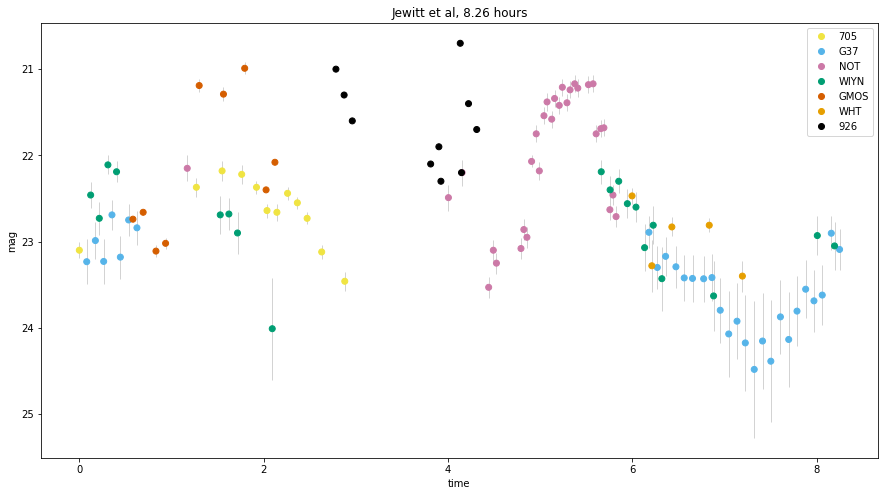

In [12]:
period = 8.26 # Jewitt et al
plotFold(period, 'Jewitt et al, 8.26 hours')
plt.savefig('plots/jewitt_fold.png')

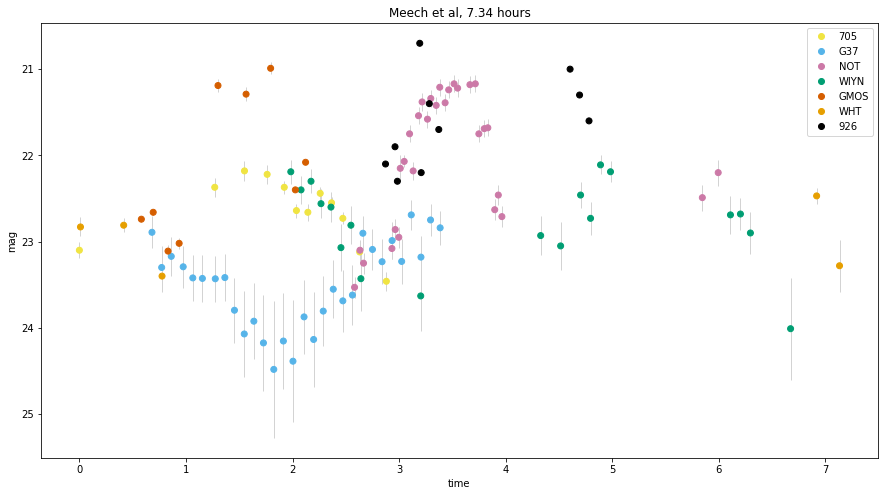

In [13]:
period = 7.34 # Meech et al  
plotFold(period, 'Meech et al, 7.34 hours')
plt.savefig('plots/meech_fold.png')

Best frequency (cycles per day) =  2.94313446056
Best period (hours) =  8.15457136657


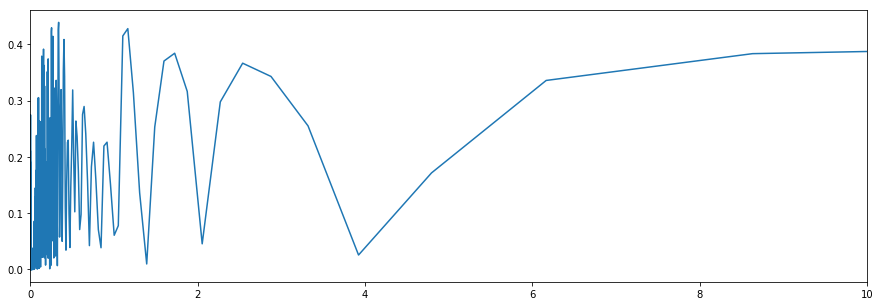

In [14]:
from astropy.stats import LombScargle
import astropy.units as u

# auxiliary function to plot a naive Lomb periodogram
def naiveLombScargle(observations):
    a = observations.mjd.values
    startTimestamp = a[0]
    a = a - a[0]

    b = observations.mag.values
    freq, power = LombScargle(a, b).autopower(nyquist_factor=100)

    plt.rcParams['figure.figsize'] = (15, 5);
    plt.figure();
    plt.plot(1/freq, power);
    plt.xlim(0,10);

    best_frequency = freq[np.argmax(power)]

    print('Best frequency (cycles per day) = ', best_frequency)
    print('Best period (hours) = ', (1/best_frequency) * 24)
    
    #t_fit = np.linspace(0*u.hour,1000*u.hour)
    #y_fit = LombScargle(a, b).model(t_fit, best_frequency)
    
    #plt.plot(y_fit);

    return freq,power
    
naiveLombScargle(allData);

Best frequency (cycles per day) =  5.81674605984
Best period (hours) =  4.12601818149


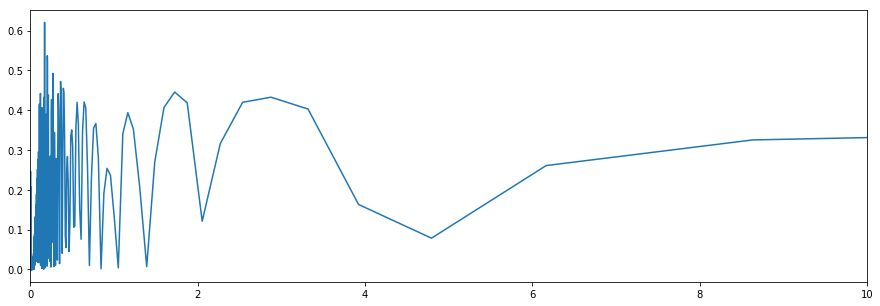

In [15]:
naiveLombScargle(pd.concat([data1, data2, data3])); # don't use MPC data